In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
frame = load_iris(as_frame=True)
df = frame['data']
X = df.values
y = np.array(frame['target'])
y_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


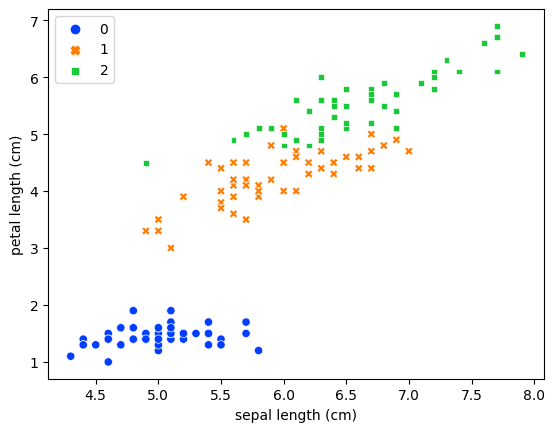

In [4]:
sns.scatterplot(data=df, 
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=y,
                style=y,
                palette="bright")
plt.show()

## Sklearn routine
- Initialize method
- fit
- transfrom/predict

### Normalizations

In [5]:
# z-score, fit and then transform
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [6]:
# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

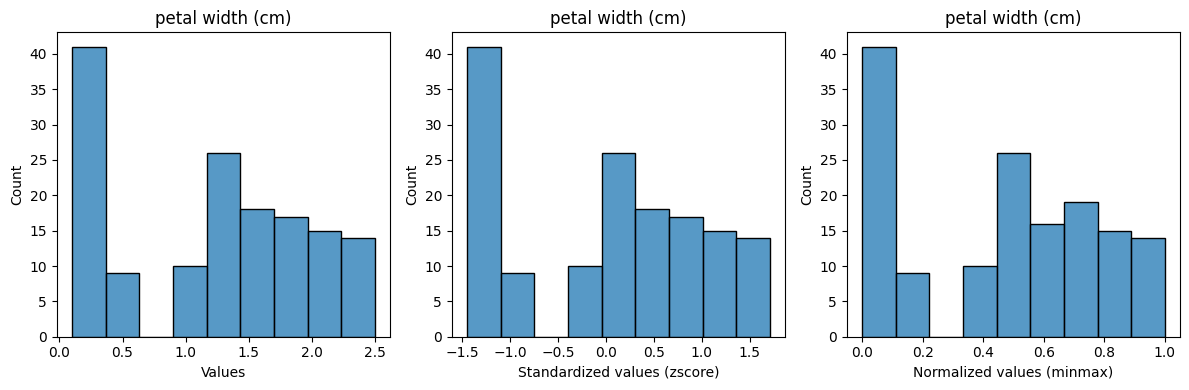

In [7]:
i = 3 # column index
fig, axs = plt.subplots(1,3, figsize=(12, 4)) # 1 row, 3 columns

sns.histplot(X[:,i], ax=axs[0]).set(title=df.columns[i])
axs[0].set(xlabel='Values')

sns.histplot(X_scal[:,i], ax=axs[1]).set(title=df.columns[i])
axs[1].set(xlabel='Standardized values (zscore)')

sns.histplot(X_minmax[:,i], ax=axs[2]).set(title=df.columns[i])
axs[2].set(xlabel='Normalized values (minmax)')

plt.tight_layout() # Adjust the padding between and around subplots

### Kmeans

In [8]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [9]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

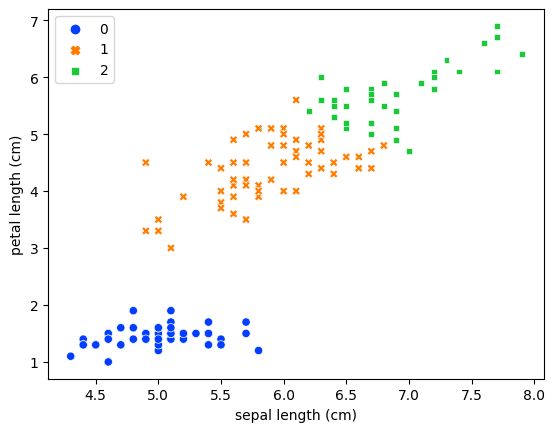

In [10]:
sns.scatterplot(data=df, 
                x="sepal length (cm)",
                y="petal length (cm)",
                hue=kmeans.labels_,
                style=kmeans.labels_,
                palette="bright")
plt.show()

In [11]:
# ndarray of shape (n_clusters, n_features)
kmeans.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [12]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88852459, 2.73770492, 4.39672131, 1.41803279],
       [6.84615385, 3.08205128, 5.7025641 , 2.07948718]])

In [13]:
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C"})

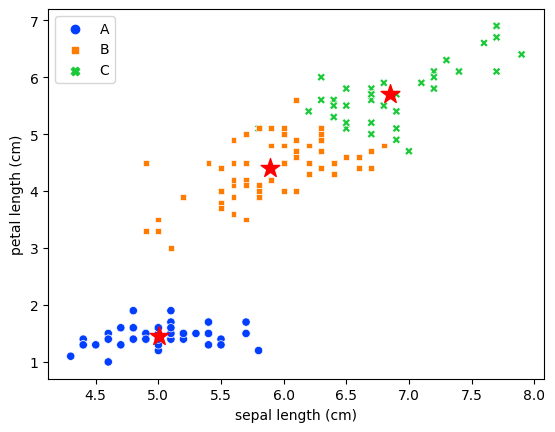

In [14]:
sns.scatterplot(data=df, 
                x="sepal length (cm)", 
                y="petal length (cm)", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C"]
               )
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()

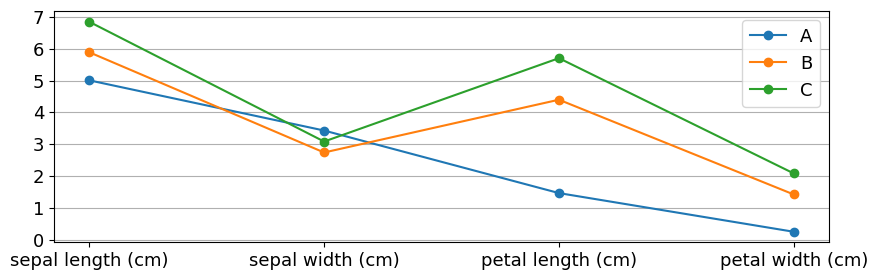

In [15]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(df.columns) - 1), df.columns[:-1], fontsize=13)
plt.yticks(fontsize=13)

plt.legend(fontsize=13, loc='best')
plt.grid(axis='y')

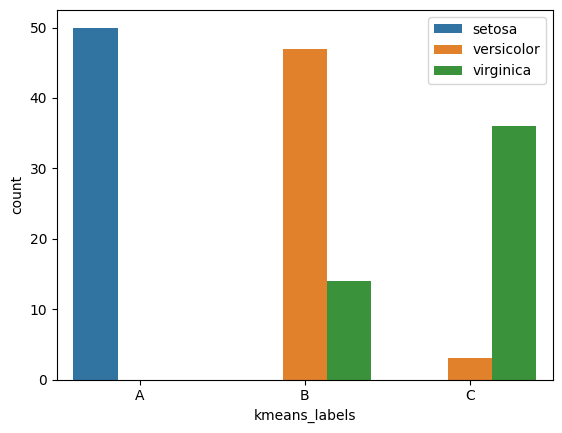

In [16]:
sns.countplot(data=df, x='kmeans_labels', hue=y_mapped, order=["A", "B", "C"])
plt.show()

In [17]:
y_mapped

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: 0, Length: 150, dtype: object

In [18]:
y_mapped.groupby(df['kmeans_labels']).value_counts(normalize=True)

kmeans_labels  0         
A              setosa        1.000000
B              versicolor    0.770492
C              versicolor    0.076923
               virginica     0.923077
B              virginica     0.229508
Name: proportion, dtype: float64

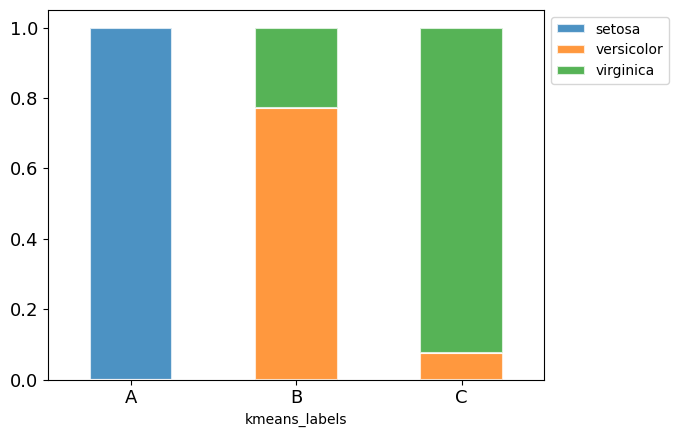

In [19]:
bar_pl = y_mapped.groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=13, rotation=0)
plt.yticks(fontsize=13)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [20]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([50, 61, 39]))

In [21]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 6.982216473785235
Silhouette 0.5047687565398589


In [22]:
# how do we select the number of clusters k?

In [23]:
%%time
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

CPU times: user 5.49 s, sys: 2.77 s, total: 8.26 s
Wall time: 920 ms


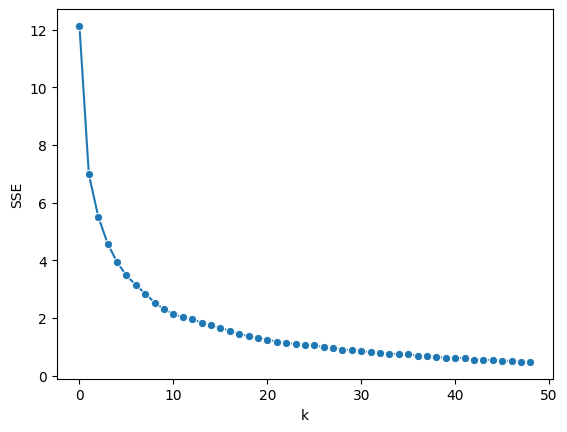

In [24]:
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

### Bisecting K-means

In [25]:
from sklearn.cluster import BisectingKMeans

In [26]:
bkmeans = BisectingKMeans(n_clusters=3, n_init=10, max_iter=100)
bkmeans.fit(X_minmax)

BisectingKMeans(max_iter=100, n_clusters=3, n_init=10)

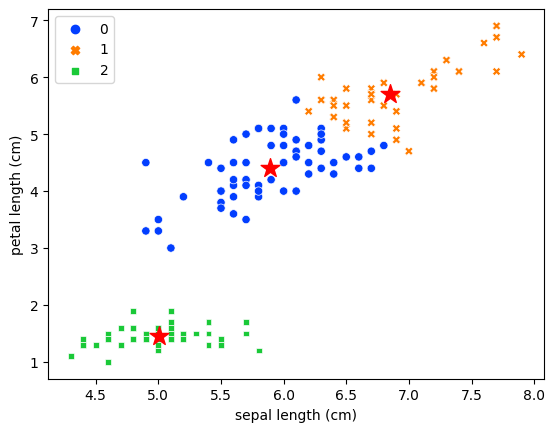

In [27]:
sns.scatterplot(data=df, 
                x="sepal length (cm)", 
                y="petal length (cm)", 
                hue=bkmeans.labels_, 
                style=bkmeans.labels_,
                palette="bright", 
               )
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()

In [28]:
print('SSE', bkmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, bkmeans.labels_))

SSE 6.982216473785235
Silhouette 0.5047687565398589


### DBScan

In [29]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_minmax)

DBSCAN(eps=0.3)

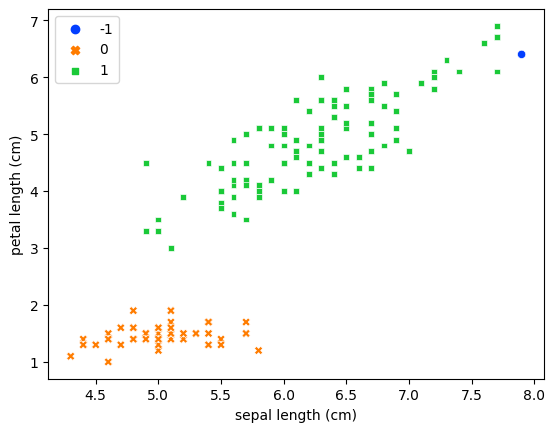

In [30]:
sns.scatterplot(data=df, 
                x="sepal length (cm)", 
                y="petal length (cm)", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

In [31]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [32]:
print('Silhouette', silhouette_score(X_minmax, dbscan.labels_))

Silhouette 0.4681853590627473


### kth neighbor distance

In [33]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

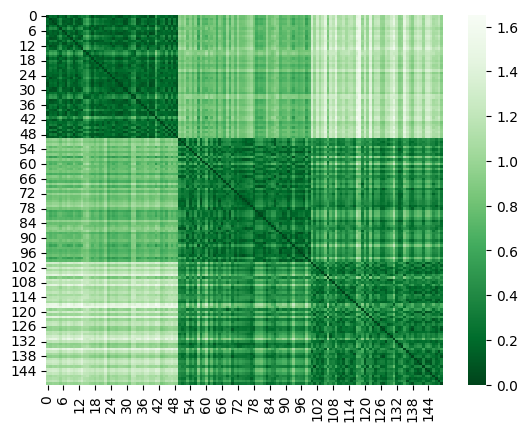

In [34]:
sns.heatmap(dist, cmap="Greens_r", annot=False)
plt.show()

In [35]:
k=4
kth_distances = []
for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

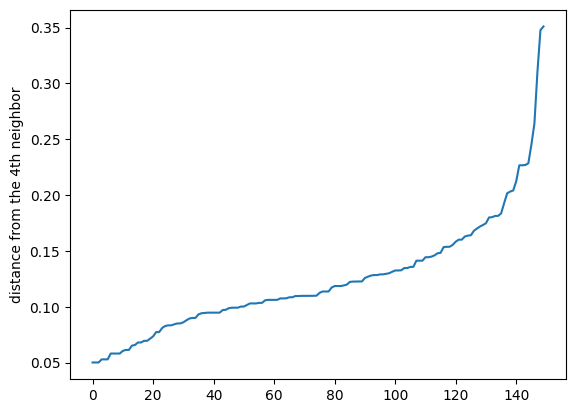

In [36]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

In [37]:
dbscan = DBSCAN(eps=0.15, min_samples=4, metric='precomputed')
dbscan.fit(dist)

DBSCAN(eps=0.15, metric='precomputed', min_samples=4)

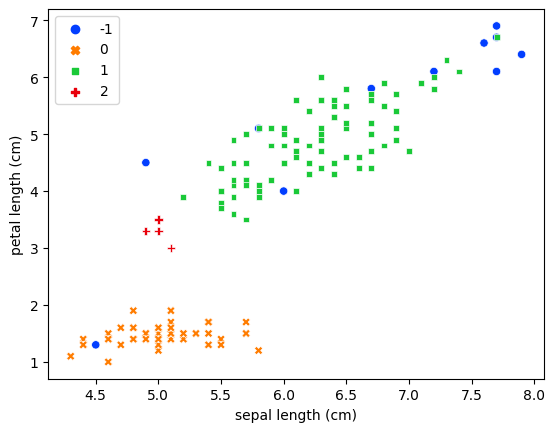

In [38]:
sns.scatterplot(data=df, 
                x="sepal length (cm)", 
                y="petal length (cm)", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

In [39]:
print('Silhouette', silhouette_score(X_minmax, dbscan.labels_))

Silhouette 0.35268068721976487


### OPTICS

In [40]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

In [41]:
optics = OPTICS(min_samples = 5, max_eps = np.inf, min_cluster_size=40)
optics.fit(X_minmax)

OPTICS(min_cluster_size=40)

In [42]:
print("Silhouette", silhouette_score(X_minmax[optics.labels_ != -1], optics.labels_[optics.labels_ != -1]))

Silhouette 0.6799159809882567


In [43]:
np.unique(optics.labels_, return_counts=True)

(array([-1,  0,  1]), array([22, 50, 78]))

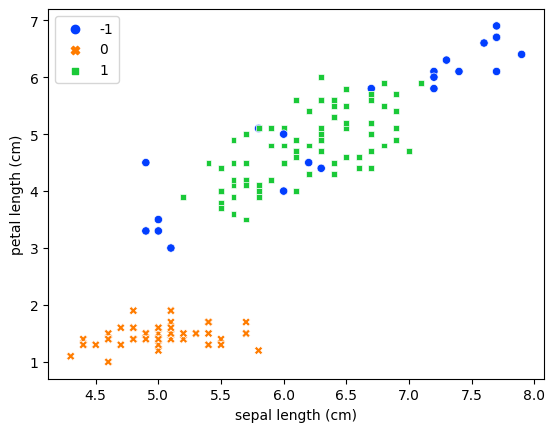

In [44]:
sns.scatterplot(data=df, 
                x="sepal length (cm)", 
                y="petal length (cm)", 
                hue=optics.labels_, 
                style=optics.labels_, 
                palette="bright")
plt.show()

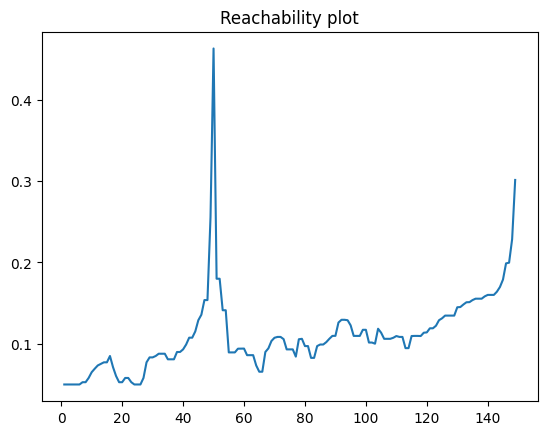

In [45]:
# Generate reachability plot
reachability = optics.reachability_[optics.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

### Hierarchical

In [46]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [47]:
# setting distance_threshold=0 ensures we compute the full tree.
# it is the linkage distance threshold above which clusters will not be merged
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='complete')
model = model.fit(X_minmax)

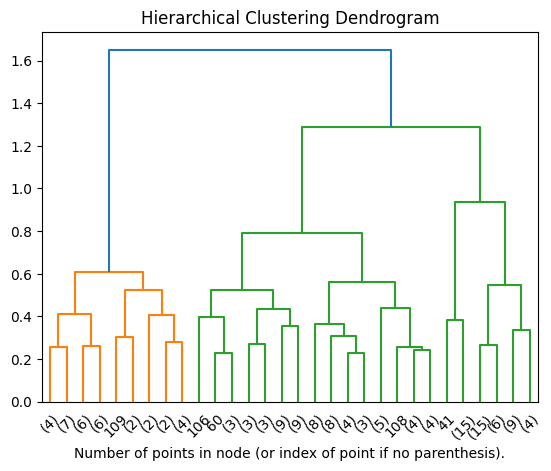

In [48]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=1.4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [49]:
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=1.4, criterion='distance')

In [50]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [51]:
print('Silhouette', silhouette_score(X_minmax, labels))

Silhouette 0.303632273533401


#### Choosing the number of clusters

In [52]:
hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

In [53]:
hier.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

#### Precomputed distance matrix

In [54]:
hier = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
hier.fit(dist)

AgglomerativeClustering(linkage='complete', metric='precomputed', n_clusters=3)

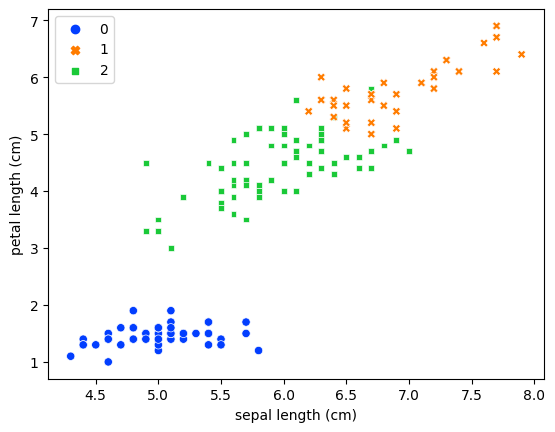

In [55]:
sns.scatterplot(data=df, 
                x="sepal length (cm)",
                y="petal length (cm)", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

###  HDBScan

In [56]:
from sklearn.cluster import HDBSCAN

In [57]:
hdb = HDBSCAN(cluster_selection_epsilon=0.3, min_samples=30, 
              min_cluster_size=5, max_cluster_size=None,
              store_centers="centroid")
hdb.fit(X_minmax)

HDBSCAN(cluster_selection_epsilon=0.3, min_samples=30, store_centers='centroid')

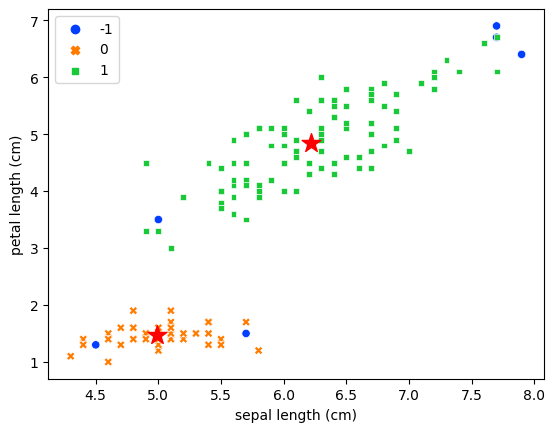

In [58]:
sns.scatterplot(data=df, 
                x="sepal length (cm)",
                y="petal length (cm)", 
                hue=hdb.labels_, 
                style=hdb.labels_, 
                palette="bright")

plt.scatter(scaler.inverse_transform(hdb.centroids_)[:,0], scaler.inverse_transform(hdb.centroids_)[:,2], c='red', marker='*', s=200)
plt.show()

In [59]:
np.unique(hdb.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 6, 48, 96]))

In [60]:
hdb.centroids_

array([[0.19207892, 0.58858965, 0.0796667 , 0.05915125],
       [0.53191836, 0.36183505, 0.65110017, 0.64597702]])

In [61]:
print("Silhouette", silhouette_score(X_minmax[hdb.labels_ != -1], optics.labels_[hdb.labels_ != -1]))

Silhouette 0.40905682564060647
